In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
df= pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Normalising data

In [20]:
scaler = StandardScaler()

In [21]:
df[["Annual Income (k$)","Spending Score (1-100)"]] = scaler.fit_transform(df[["Annual Income (k$)","Spending Score (1-100)"]])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.738999,-0.434801
1,2,Male,21,-1.738999,1.195704
2,3,Female,20,-1.700830,-1.715913
3,4,Female,23,-1.700830,1.040418
4,5,Female,31,-1.662660,-0.395980
...,...,...,...,...,...
195,196,Female,35,2.268791,1.118061
196,197,Female,45,2.497807,-0.861839
197,198,Male,32,2.497807,0.923953
198,199,Male,32,2.917671,-1.250054


# Clustering the data

Identifying the optimum number of clusters : The Elbow Method

In [22]:
def optimise_k_means(data, max_k):
    means=[]
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        

    fig = plt.subplots(figsize= (10,5))
    plt.plot(means, inertias, "o-")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

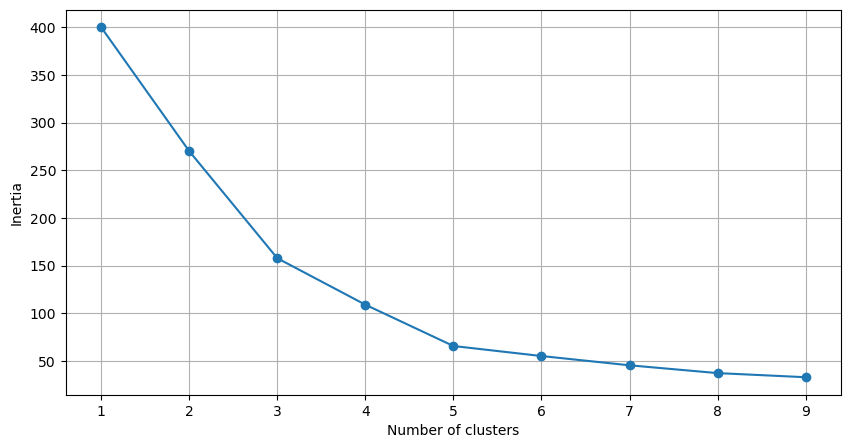

In [24]:
optimise_k_means(df[["Spending Score (1-100)","Annual Income (k$)"]],10)

# Applying K Means Clustering

In [46]:
kmeans = KMeans(n_clusters = 5)

In [47]:
kmeans.fit(df[["Spending Score (1-100)", "Annual Income (k$)"]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [50]:
df["cluster"] = kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_5,cluster
0,1,Male,19,-1.738999,-0.434801,0,3
1,2,Male,21,-1.738999,1.195704,4,4
2,3,Female,20,-1.700830,-1.715913,0,3
3,4,Female,23,-1.700830,1.040418,4,4
4,5,Female,31,-1.662660,-0.395980,0,3
...,...,...,...,...,...,...,...
195,196,Female,35,2.268791,1.118061,2,1
196,197,Female,45,2.497807,-0.861839,3,2
197,198,Male,32,2.497807,0.923953,2,1
198,199,Male,32,2.917671,-1.250054,3,2


# Plotting the results

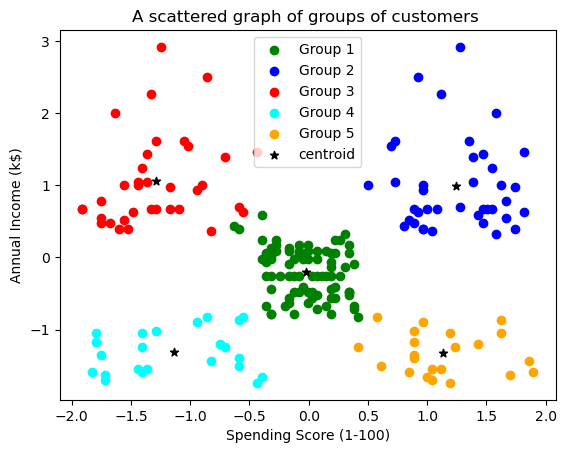

In [49]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'],color='green', label='Group 1')
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],color='blue', label='Group 2')
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'],color='red', label='Group 3')
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],color='cyan', label='Group 4')
plt.scatter(df5['Spending Score (1-100)'],df5['Annual Income (k$)'],color='orange', label='Group 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',label='centroid')

plt.title('A scattered graph of groups of customers ')
fontdict = {'fontweight': 'bold'}
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend()